In [1]:
import pandas as pd  # Importing the Pandas library for data manipulation and analysis.
import numpy as np  # Importing the NumPy library for numerical computations and array operations.
import matplotlib.pyplot as plt  # Importing the Matplotlib library for data visualization.
import seaborn as sns  # Importing the Seaborn library for creating statistical graphics.
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for splitting data into training and testing subsets.
from sklearn.ensemble import RandomForestClassifier  # Importing the RandomForestClassifier class for building a random forest classifier model.
from sklearn.metrics import accuracy_score  # Importing the accuracy_score function for evaluating classification accuracy.
from sklearn.model_selection import cross_val_score  # Importing the cross_val_score function for performing cross-validation.
from sklearn.model_selection import GridSearchCV  # Importing the GridSearchCV class for hyperparameter tuning using grid search.
from sklearn.metrics import confusion_matrix  # Importing the confusion_matrix function for computing the confusion matrix.
from sklearn.metrics import classification_report  # Importing the classification_report function for generating a classification report.
from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler class for feature scaling.
from sklearn.preprocessing import OneHotEncoder  # Importing the OneHotEncoder class for one-hot encoding categorical features.
from sklearn.compose import ColumnTransformer  # Importing the ColumnTransformer class for applying different transformations to different columns.
from sklearn.pipeline import Pipeline

import shap
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [3]:
import os

# List files in the directory
files = os.listdir(path)
print("Files in the directory:", files)

Files in the directory: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


**Reasoning**:
The previous attempt to load the data failed because the file path was incorrect. I will try loading the data again using the correct file path provided in the error message.



In [4]:
# Load the data from the downloaded path
file_path = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)


# Display the first 5 rows of the dataframe
display(df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Reasoning**:
The `TotalCharges` column is of object type and should be numerical. I will convert it to numeric, coercing errors to NaN, and then check for missing values in the entire DataFrame.



In [5]:
# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #NaN


# Check for missing values in the DataFrame
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
# Drop rows with missing values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Verify that missing values have been handled
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']
type(X)

# Convert 'Churn' column to binary (0 for 'No', 1 for 'Yes')
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical and continuous features
# 'customerID' is an identifier and should be dropped
categorical_features = X.select_dtypes(include='object').columns.tolist()
print(categorical_features)
categorical_features.remove('customerID') # Remove customerID from categorical features
#print(categorical_features)
continuous_features = X.select_dtypes(include=np.number).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
     remainder='drop' # Drop 'CustomerID' and any other non-specified columns
)

# Apply preprocessing
X_processed0 = preprocessor.fit_transform(X)

# 4. Get feature names after one-hot encoding
ohe_feature_names_clustering = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names_clustering = continuous_features + list(ohe_feature_names_clustering)

# 5. Create a DataFrame with the processed features for clustering
X_processed = pd.DataFrame(X_processed0, columns=all_feature_names_clustering)

print("Data prepared for clustering, including engineered features.")
print("First 5 rows of the df_clustering DataFrame:")
print(X_processed.head())

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Data prepared for clustering, including engineered features.
First 5 rows of the df_clustering DataFrame:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0      -0.440327 -1.280248       -1.161694     -0.994194            1.0   
1      -0.440327  0.064303       -0.260878     -0.173740            0.0   
2      -0.440327 -1.239504       -0.363923     -0.959649            0.0   
3      -0.440327  0.512486       -0.747850     -0.195248            0.0   
4      -0.440327 -1.239504        0.196178     -0.940457            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0          0.0         0.0          1.0            1.0             0.0  ...   
1          1.0         1.0     

In [8]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


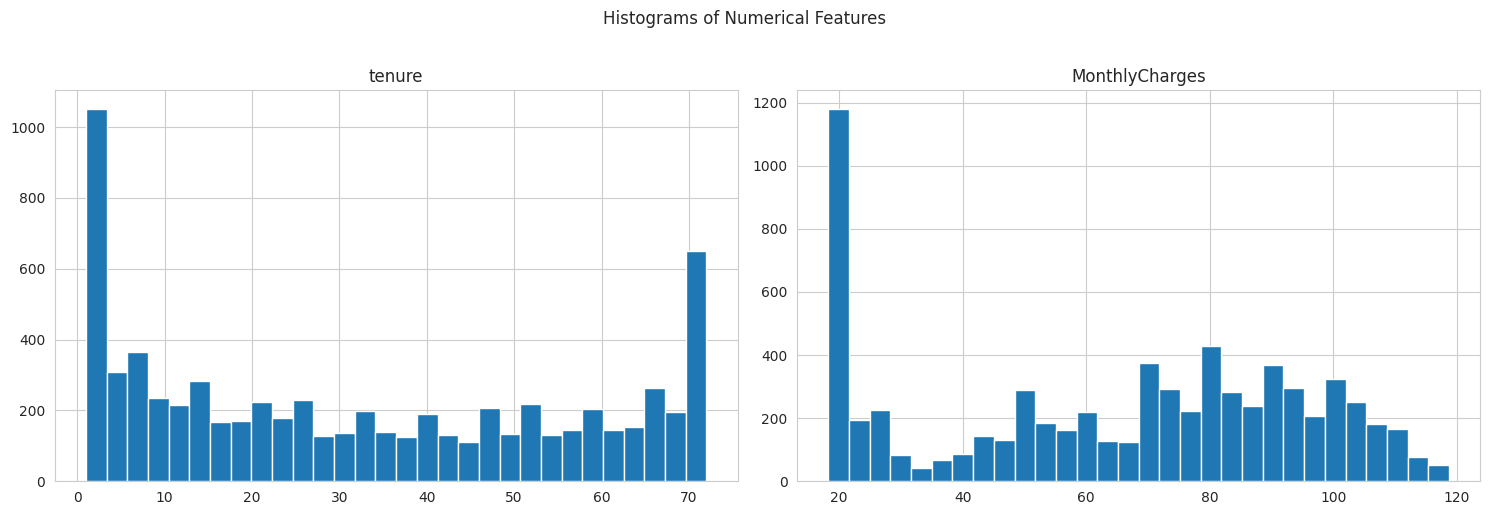

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Histograms for numerical features
numerical_features = ['tenure', 'MonthlyCharges']
df[numerical_features].hist(bins=30, figsize=(15, 5))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()



/tmp/ipython-input-654901002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-654901002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-654901002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-654901002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

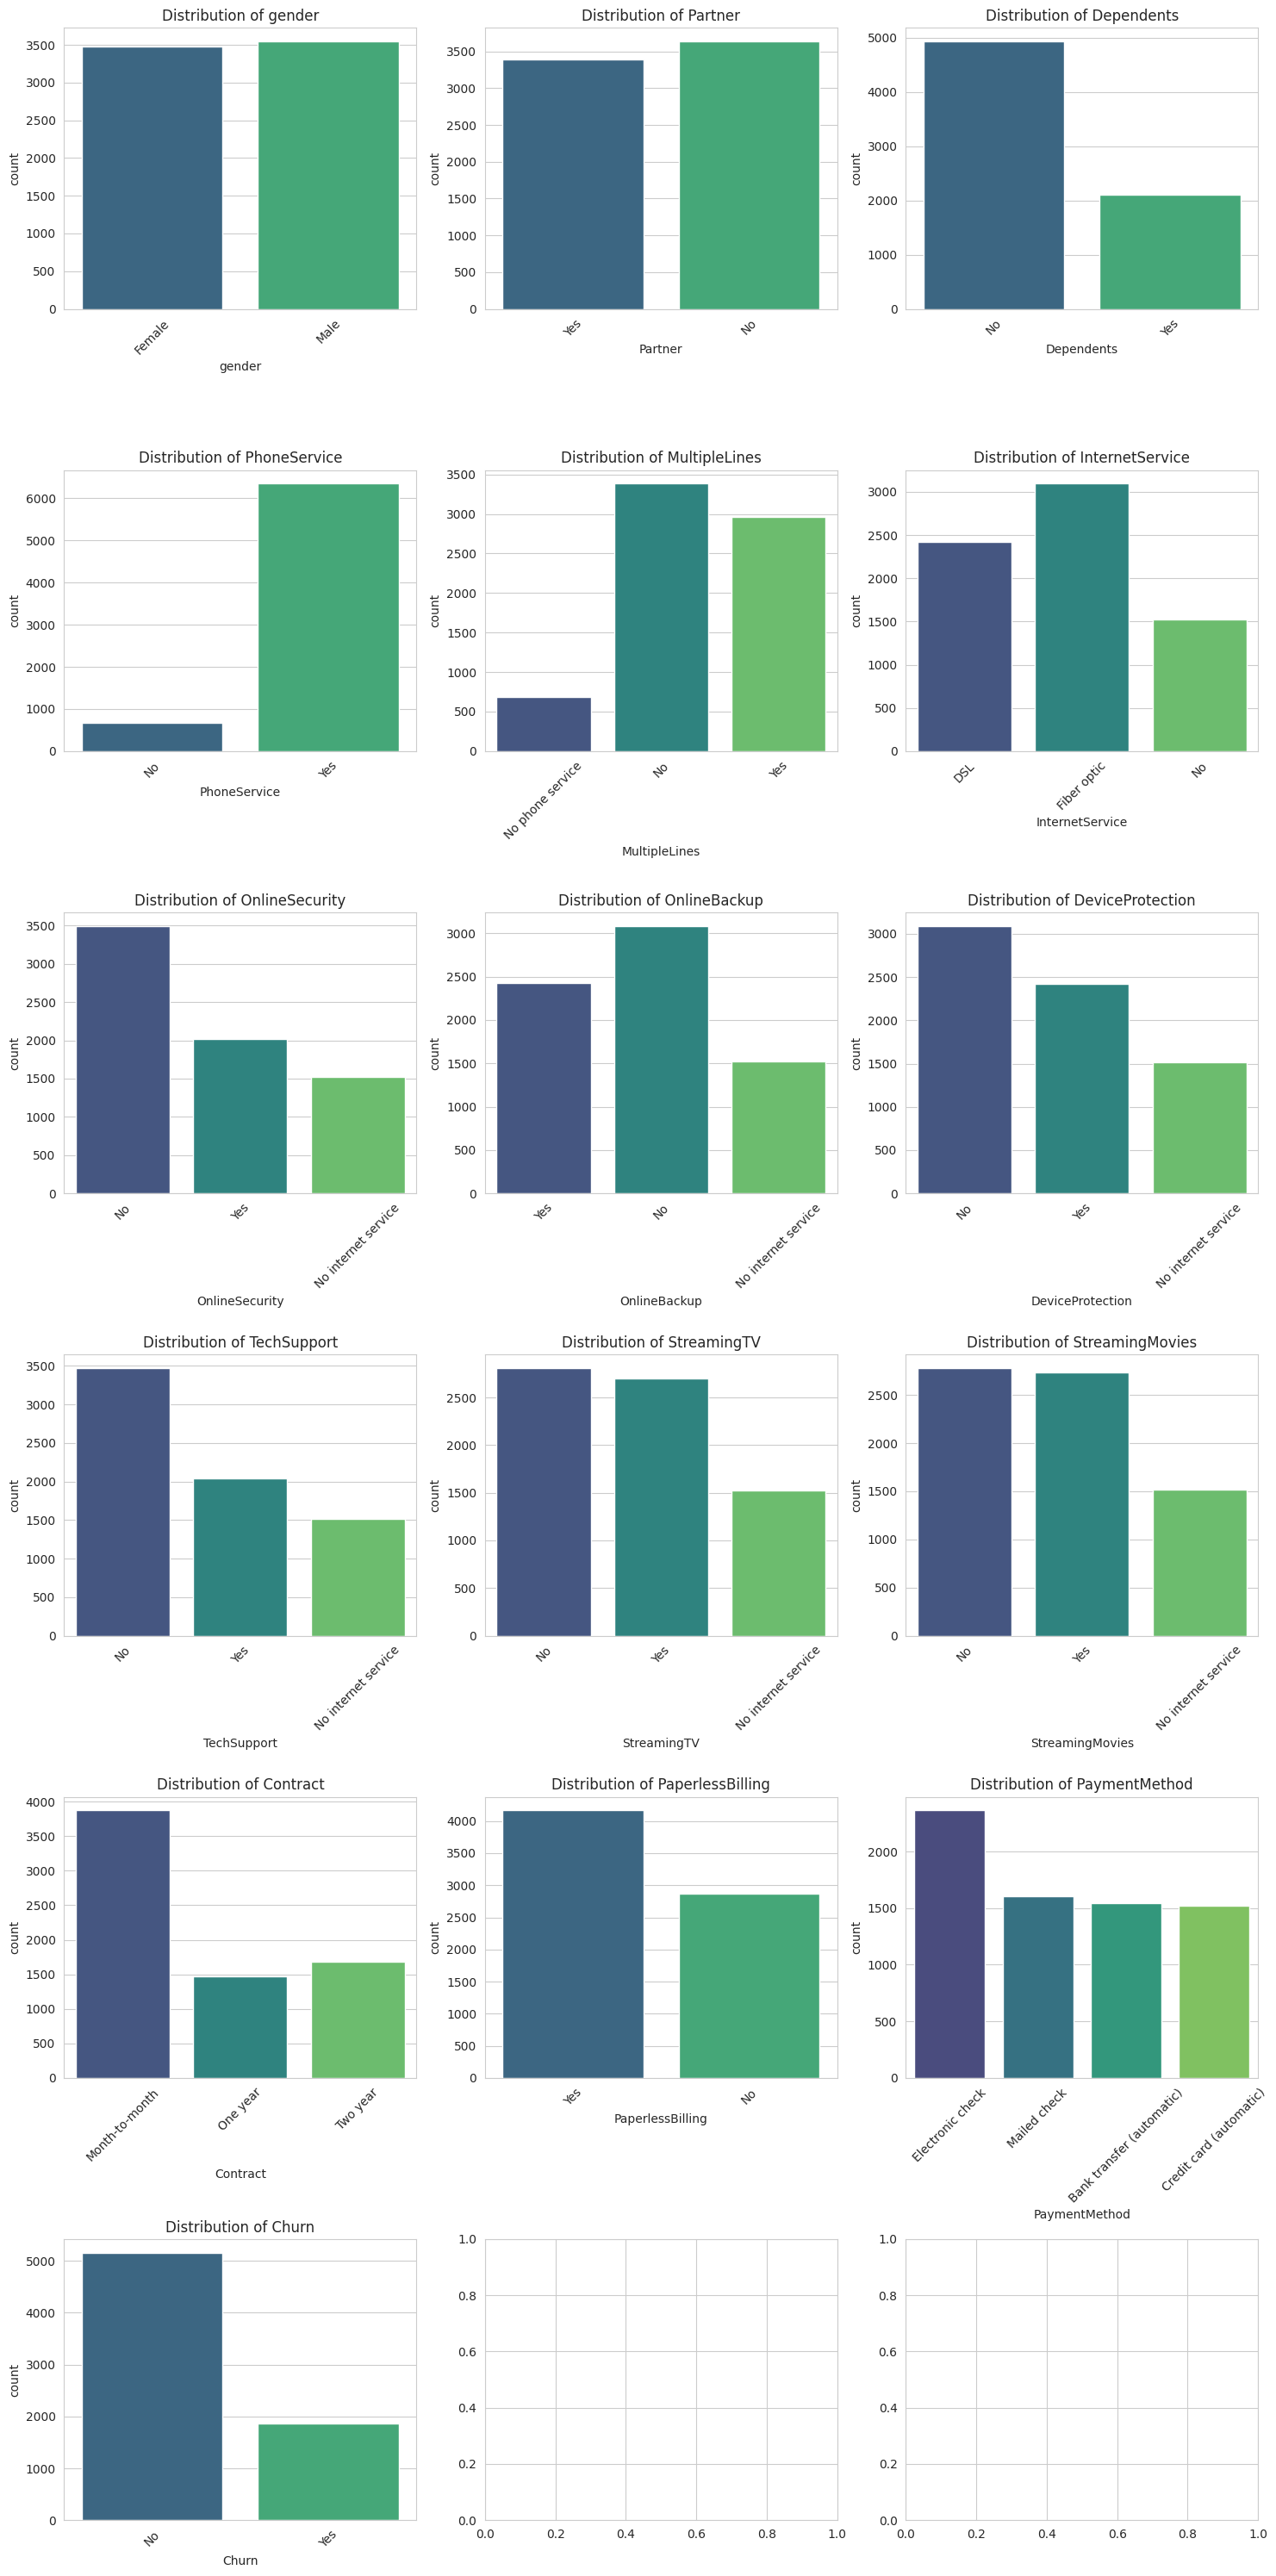

In [10]:
# Bar plots for categorical features
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('customerID')

fig, axes = plt.subplots(nrows=len(categorical_features)//3 + (len(categorical_features)%3 > 0), ncols=3, figsize=(15, 5 * (len(categorical_features)//3 + (len(categorical_features)%3 > 0))))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Reasoning**:
Create a correlation heatmap of the numerical features, including the binary 'Churn' column, to identify relationships.



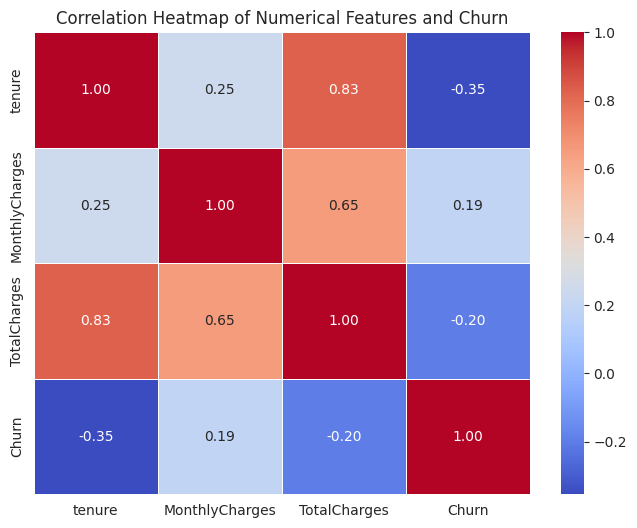

In [11]:
# Create a copy of the dataframe to include the binary 'Churn' column for correlation calculation
df_corr = df.copy()
df_corr['Churn'] = y # y is already the binary churn column

# Select only the numerical columns including the binary 'Churn' column
numerical_df_corr = df_corr[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Calculate the correlation matrix
correlation_matrix = numerical_df_corr.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

## Feature engineering

### Subtask:
Create new features like 'total charges per tenure', binary features, and grouped payment methods to capture customer loyalty.


**Reasoning**:
Create new features as requested in the instructions.



In [12]:
# Create 'TotalChargesPerTenure'
# Add a small epsilon to tenure to avoid division by zero before replacing infinities/NaNs
df['TotalChargesPerTenure'] = df['TotalCharges'] / (df['tenure'] + 1e-6)
df['TotalChargesPerTenure'] = df['TotalChargesPerTenure'].replace([np.inf, -np.inf, np.nan], 0)


# Create binary features from relevant categorical columns
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Group PaymentMethod categories into 'automatic' and 'manual'
automatic_payment_methods = ['Bank transfer (automatic)', 'Credit card (automatic)']
df['PaymentMethod_Grouped'] = df['PaymentMethod'].apply(lambda x: 'Automatic' if x in automatic_payment_methods else 'Manual')

# One-hot encoding the grouped payment method
payment_method_grouped_dummies = pd.get_dummies(df['PaymentMethod_Grouped'], prefix='PaymentMethod_Grouped', drop_first=False)
df = pd.concat([df, payment_method_grouped_dummies], axis=1)

# Drop the original 'PaymentMethod' and the intermediate 'PaymentMethod_Grouped' column
df.drop(['PaymentMethod', 'PaymentMethod_Grouped'], axis=1, inplace=True)


# Display the first few rows with the new features
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalChargesPerTenure,PaymentMethod_Grouped_Automatic,PaymentMethod_Grouped_Manual
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,29.85,29.85,No,29.849970,False,True
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,56.95,1889.50,No,55.573528,False,True
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,53.85,108.15,Yes,54.074973,False,True
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,42.30,1840.75,No,40.905555,True,False
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,70.70,151.65,Yes,75.824962,False,True


Independent Samples t-test for MonthlyCharges:
  t-statistic: 16.4796
  p-value: 0.0000

Visualizing Churn Differences for Categorical Features:


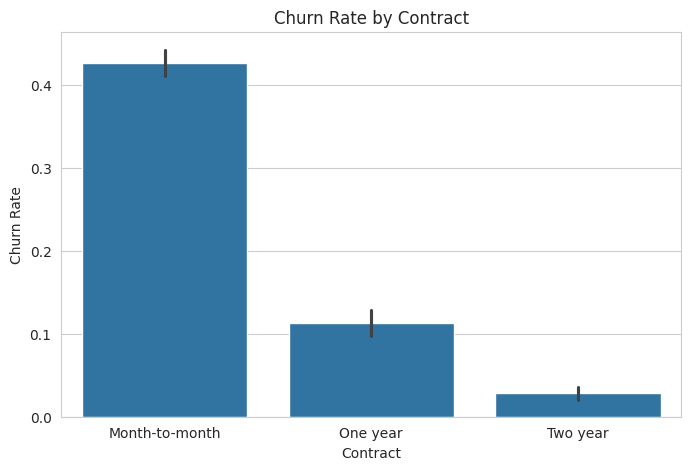

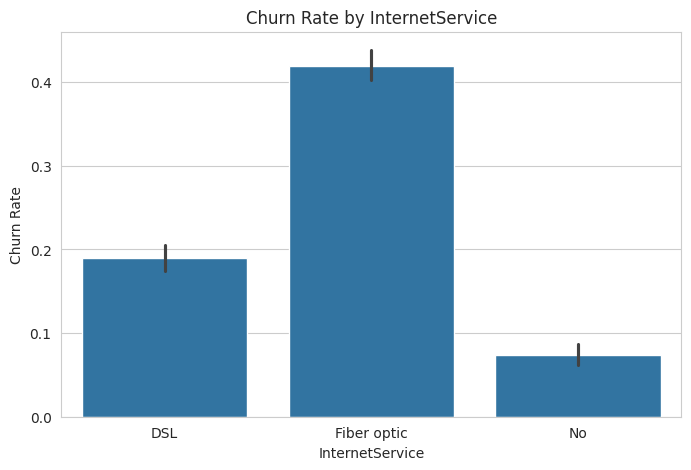

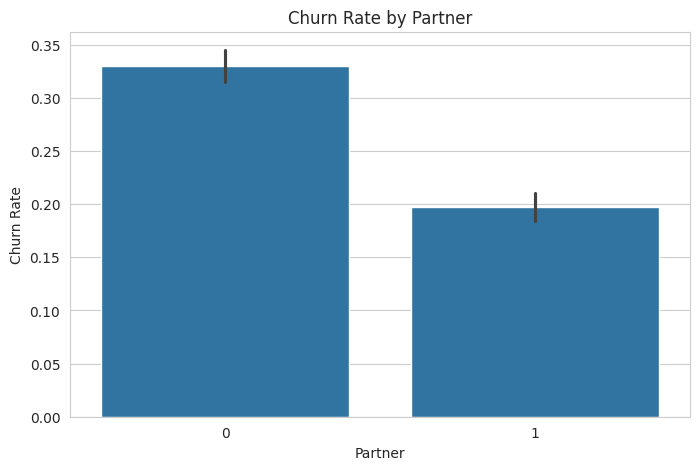

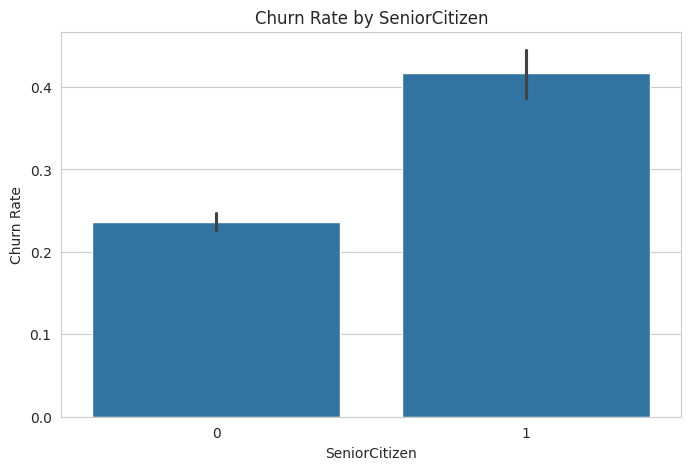


Visualizing Churn Differences for Numerical Features:


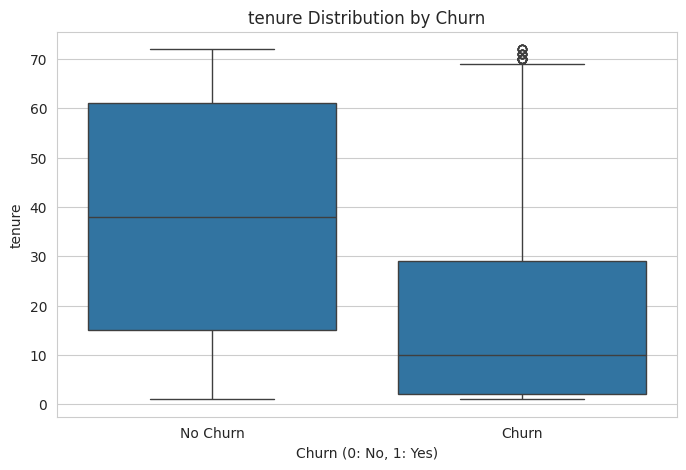

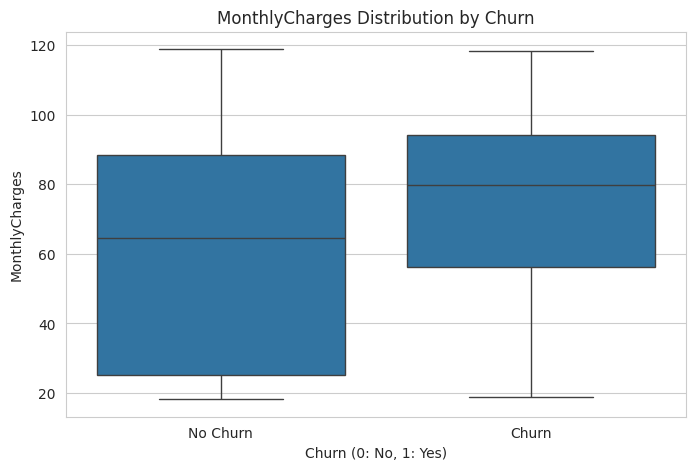

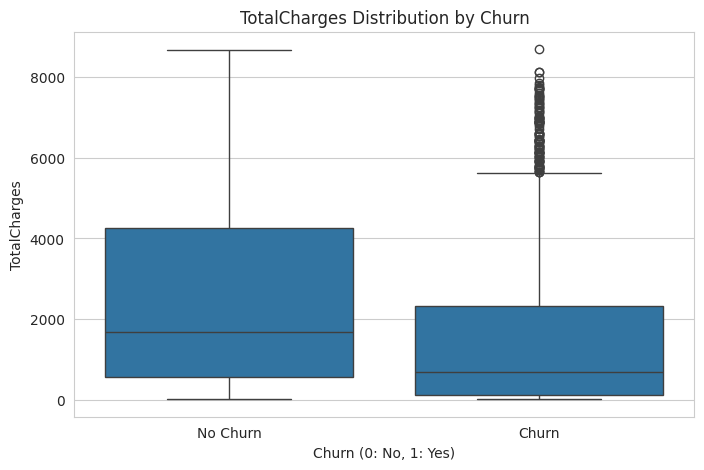

In [13]:
from scipy import stats
# Skipping statsmodels import for confidence interval due to persistent errors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'Churn' is numeric (0 or 1) - Re-applying the conversion just in case
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 1. Independent samples t-test for MonthlyCharges
churned_monthly_charges = df[df['Churn'] == 1]['MonthlyCharges']
non_churned_monthly_charges = df[df['Churn'] == 0]['MonthlyCharges']

# Check sample sizes for t-test
if len(churned_monthly_charges) > 1 and len(non_churned_monthly_charges) > 1:
    t_statistic, p_value = stats.ttest_ind(churned_monthly_charges, non_churned_monthly_charges)
    print(f"Independent Samples t-test for MonthlyCharges:")
    print(f"  t-statistic: {t_statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")
else:
    print("Cannot perform t-test: Sample size for churned or non-churned customers is too small.")
    t_statistic, p_value = np.nan, np.nan # Assign NaN if test cannot be performed

# Separate data for visualization (still useful for plotting)
churned_df = df[df['Churn'] == 1].copy()
non_churned_df = df[df['Churn'] == 0].copy()

# 3. Select a few relevant categorical and numerical features to visualize churn differences.
# Based on previous EDA and common sense.
categorical_features_to_plot = ['Contract', 'PaymentMethod_Electronic check', 'InternetService', 'Partner', 'SeniorCitizen']
numerical_features_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 4. For categorical features, create bar plots showing the churn rate within each category.
print("\nVisualizing Churn Differences for Categorical Features:")
for feature in categorical_features_to_plot:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=feature, y='Churn', data=df)
        plt.title(f'Churn Rate by {feature}')
        plt.ylabel('Churn Rate')
        plt.xlabel(feature)
        plt.show()
    else:
        print(f"Warning: Categorical feature '{feature}' not found in DataFrame.")


# 5. For numerical features, create box plots showing the distribution for churned and non-churned customers.
print("\nVisualizing Churn Differences for Numerical Features:")
for feature in numerical_features_to_plot:
     if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Churn', y=feature, data=df)
        plt.title(f'{feature} Distribution by Churn')
        plt.xlabel('Churn (0: No, 1: Yes)')
        plt.ylabel(feature)
        plt.xticks([0, 1], ['No Churn', 'Churn'])
        plt.show()
     else:
        print(f"Warning: Numerical feature '{feature}' not found in DataFrame.")

In [14]:
# Check the distribution of the 'Churn' column
churn_distribution = df['Churn'].value_counts()
print("Distribution of Churn (0: No Churn, 1: Churn):")
print(churn_distribution)

# Calculate the percentage of each class
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Churn:")
display(churn_percentage)

Distribution of Churn (0: No Churn, 1: Churn):
Churn
0    5163
1    1869
Name: count, dtype: int64

Percentage Distribution of Churn:


,proportion
Churn,
0,73.421502
1,26.578498


In [15]:
from imblearn.over_sampling import SMOTE


In [16]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
# Dropping 'customerID' from X as it's an identifier and not a feature for the model
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Convert 'Churn' column to binary (0 for 'No', 1 for 'Yes') if not already done
if y.dtype == 'object':
    y = y.apply(lambda x: 1 if x == 'Yes' else 0)


# Identify categorical and continuous features from the updated X
categorical_features = X.select_dtypes(include='object').columns.tolist()
continuous_features = X.select_dtypes(include=np.number).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Initialize and train a LogisticRegression model using resampled data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# 3. Initialize and train a RandomForestClassifier model using resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 4. Initialize and train a GradientBoostingClassifier model using resampled data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

print("Models trained successfully using SMOTE-resampled data.")

Models trained successfully using SMOTE-resampled data.


In [17]:
# Define the scoring metrics for cross-validation and evaluation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 5. Perform cross-validation on the training data
print("Performing cross-validation...")
lr_cv_results = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
rf_cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring)
gb_cv_results = cross_validate(gb_model, X_train, y_train, cv=5, scoring=scoring)
print("Cross-validation completed.")

# 6. Evaluate each model on the test set
print("\nEvaluating models on the test set...")
lr_test_pred = lr_model.predict(X_test)
rf_test_pred = rf_model.predict(X_test)
gb_test_pred = gb_model.predict(X_test)

lr_test_metrics = {
    'accuracy': accuracy_score(y_test, lr_test_pred),
    'precision': precision_score(y_test, lr_test_pred),
    'recall': recall_score(y_test, lr_test_pred),
    'f1': f1_score(y_test, lr_test_pred)
}

rf_test_metrics = {
    'accuracy': accuracy_score(y_test, rf_test_pred),
    'precision': precision_score(y_test, rf_test_pred),
    'recall': recall_score(y_test, rf_test_pred),
    'f1': f1_score(y_test, rf_test_pred)
}

gb_test_metrics = {
    'accuracy': accuracy_score(y_test, gb_test_pred),
    'precision': precision_score(y_test, gb_test_pred),
    'recall': recall_score(y_test, gb_test_pred),
    'f1': f1_score(y_test, gb_test_pred)
}
print("Test set evaluation completed.")

# 7. Print the mean and standard deviation of the cross-validation scores
print("\nCross-validation Results (Mean ± Std):")
print("Logistic Regression:")
for metric in scoring:
    if f'test_{metric}' in lr_cv_results:
        mean = lr_cv_results[f'test_{metric}'].mean()
        std = lr_cv_results[f'test_{metric}'].std()
        print(f"  {metric}: {mean:.4f} ± {std:.4f}")
    else:
        print(f"  {metric}: N/A (Metric not available in CV results)")


print("\nRandom Forest:")
for metric in scoring:
    if f'test_{metric}' in rf_cv_results:
        mean = rf_cv_results[f'test_{metric}'].mean()
        std = rf_cv_results[f'test_{metric}'].std()
        print(f"  {metric}: {mean:.4f} ± {std:.4f}")
    else:
        print(f"  {metric}: N/A (Metric not available in CV results)")

print("\nGradient Boosting:")
for metric in scoring:
     if f'test_{metric}' in gb_cv_results:
        mean = gb_cv_results[f'test_{metric}'].mean()
        std = gb_cv_results[f'test_{metric}'].std()
        print(f"  {metric}: {mean:.4f} ± {std:.4f}")
     else:
        print(f"  {metric}: N/A (Metric not available in CV results)")


# 8. Print the evaluation metrics for each model on the test set
print("\nTest Set Evaluation Metrics:")
print("Logistic Regression:", lr_test_metrics)
print("Random Forest:", rf_test_metrics)
print("Gradient Boosting:", gb_test_metrics)

# 9. Calculate and print the ROC AUC score and the Average Precision score for each model on the test set
lr_test_proba = lr_model.predict_proba(X_test)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]
gb_test_proba = gb_model.predict_proba(X_test)[:, 1]

lr_roc_auc = roc_auc_score(y_test, lr_test_proba)
rf_roc_auc = roc_auc_score(y_test, rf_test_proba)
gb_roc_auc = roc_auc_score(y_test, gb_test_proba)

lr_avg_precision = average_precision_score(y_test, lr_test_proba)
rf_avg_precision = average_precision_score(y_test, rf_test_proba)
gb_avg_precision = average_precision_score(y_test, gb_test_proba)

print("\nTest Set ROC AUC and Average Precision:")
print(f"Logistic Regression - ROC AUC: {lr_roc_auc:.4f}, Average Precision: {lr_avg_precision:.4f}")
print(f"Random Forest - ROC AUC: {rf_roc_auc:.4f}, Average Precision: {rf_avg_precision:.4f}")
print(f"Gradient Boosting - ROC AUC: {gb_roc_auc:.4f}, Average Precision: {gb_avg_precision:.4f}")

# 10. Store the predicted probabilities for the positive class (churn) for each model on the test set
# These are already calculated as lr_test_proba, rf_test_proba, and gb_test_proba
# They are available in the kernel for the next steps.
print("\nPredicted probabilities for the positive class on the test set have been stored.")

Performing cross-validation...
Cross-validation completed.

Evaluating models on the test set...
Test set evaluation completed.

Cross-validation Results (Mean ± Std):
Logistic Regression:
  accuracy: 0.8085 ± 0.0126
  precision: 0.6650 ± 0.0244
  recall: 0.5619 ± 0.0346
  f1: 0.6090 ± 0.0305
  roc_auc: 0.8474 ± 0.0172

Random Forest:
  accuracy: 0.7970 ± 0.0051
  precision: 0.6488 ± 0.0180
  recall: 0.5171 ± 0.0202
  f1: 0.5750 ± 0.0112
  roc_auc: 0.8311 ± 0.0092

Gradient Boosting:
  accuracy: 0.8023 ± 0.0090
  precision: 0.6577 ± 0.0221
  recall: 0.5344 ± 0.0217
  f1: 0.5896 ± 0.0201
  roc_auc: 0.8490 ± 0.0150

Test Set Evaluation Metrics:
Logistic Regression: {'accuracy': 0.7412935323383084, 'precision': 0.5084745762711864, 'recall': 0.8021390374331551, 'f1': 0.6224066390041494}
Random Forest: {'accuracy': 0.7654584221748401, 'precision': 0.5578947368421052, 'recall': 0.5668449197860963, 'f1': 0.5623342175066313}
Gradient Boosting: {'accuracy': 0.7661691542288557, 'precision': 0.55

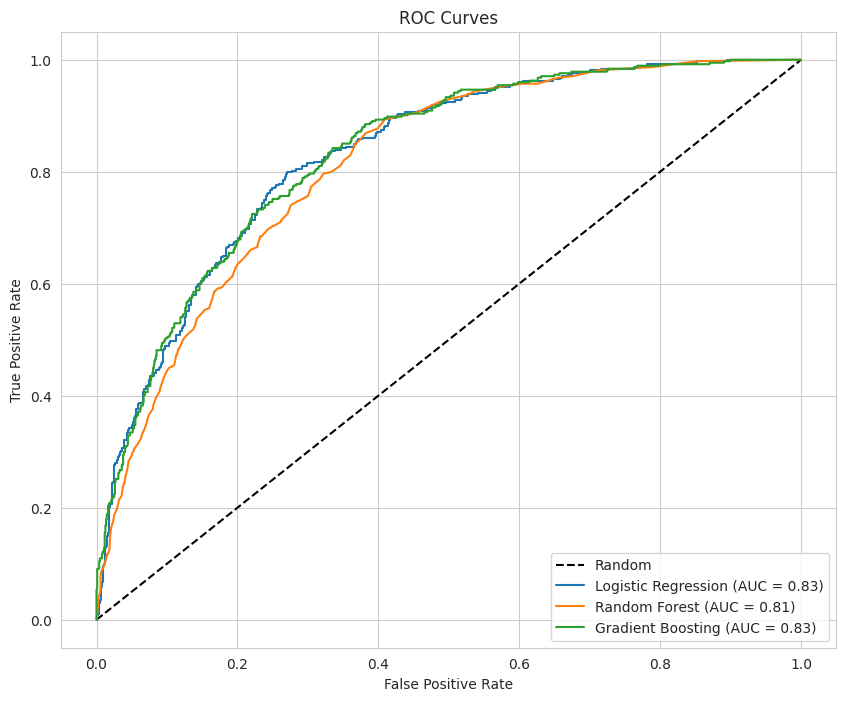

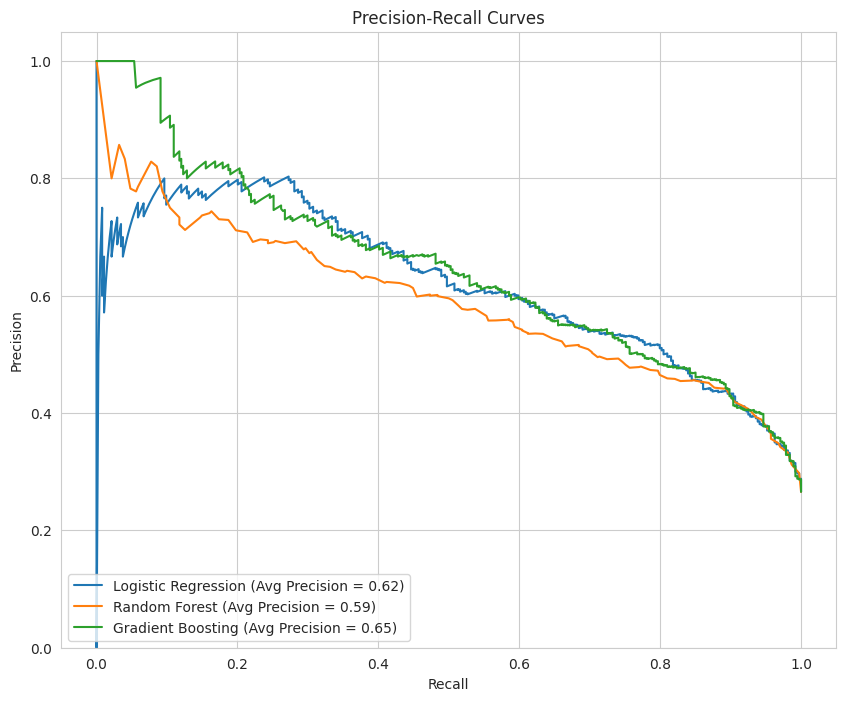

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get predicted probabilities for the positive class (churn=1) from the models on the test set
# These were already calculated in the previous step and stored as:
# lr_test_proba, rf_test_proba, gb_test_proba

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_test_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))

# Logistic Regression Precision-Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_test_proba)
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (Avg Precision = {lr_avg_precision:.2f})')

# Random Forest Precision-Recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_test_proba)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (Avg Precision = {rf_avg_precision:.2f})')

# Gradient Boosting Precision-Recall
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_test_proba)
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (Avg Precision = {gb_avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.ylim([0, 1.05])
plt.show()